# Initial data checks

Throughout this notebook we review the datasets for each available pumps to understand the data structure and assess their properties, shortcomings,...
The information learned from this initial exploration is then used to create more detailed analyses using the `PA-data_exploration.ipynb` and the relative papermill launcher notebook.

## Path setup

In [1]:
from pathlib import Path
import os

At this stage the data is loaded from local storage. Connection to the MongoDB database will have to be implemented.

In [2]:
# Data location
DATA_FOLDER = Path("../data")

## Package imports

In [3]:
# Data handling
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 60)

# Data viz
import matplotlib.pyplot as plt

## Import data

In [4]:
# Foul pumps
data_1A1029 = pd.read_csv(DATA_FOLDER / "unit_history_formatted_1A1029_FW.csv")
data_1A6027 = pd.read_csv(DATA_FOLDER / "unit_history_formatted_1A6027_FW.csv")
data_1C1074 = pd.read_csv(DATA_FOLDER / "unit_history_formatted_1C1074_FW.csv")
data_1D4136 = pd.read_csv(DATA_FOLDER / "unit_history_formatted_1D4136_FW.csv")

# Ground pumps
data_1A5008 = pd.read_csv(DATA_FOLDER / "unit_history_formatted_1A5008_GW.csv")
data_1A5025 = pd.read_csv(DATA_FOLDER / "unit_history_formatted_1A5025_GW.csv")
data_1A5034 = pd.read_csv(DATA_FOLDER / "unit_history_formatted_1A5034_GW.csv")
data_1C1072 = pd.read_csv(DATA_FOLDER / "unit_history_formatted_1C1072_GW.csv")

/home/pandrich/.local/share/virtualenvs/ppspumps-ItrG1es1/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (84) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/pandrich/.local/share/virtualenvs/ppspumps-ItrG1es1/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (84,86) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/pandrich/.local/share/virtualenvs/ppspumps-ItrG1es1/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (84,85,86) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Review datasets

We sequentially go through all the datasets to understand the data structure and determine what variables are usable in our analysis. Note that this notebook is not optimized for a quick and standardized analysis but rather focuses on highlighting similarities and differences between the datasets. Where data behavior is similar between datasets we avoid repeating comments and explanations.

### pump 1D4136_FW

In [5]:
data_1D4136.columns

Index(['Id', 'RawData_Id', 'Serial_no', 'Rec_id', 'Time_stamp', 'Real_time',
       'Sec_code', 'Box_designator', 'SW_rel', 'P1_cycles', 'P2_cycles',
       'P3_cycles', 'P1_cycleshour', 'P2_cycleshour', 'P3_cycleshour',
       'P1_cyctime', 'P2_cyctime', 'P3_cyctime', 'P1_start_cur',
       'P2_start_cur', 'P3_start_cur', 'P1_steady_cur', 'P2_steady_cur',
       'P3_steady_cur', 'P1_volts', 'P2_volts', 'P3_volts', 'Float_1',
       'Float_2', 'Last_meg_P1', 'Last_meg_P2', 'Last_meg_P3', 'Float_1_time',
       'Float_2_time', 'WiFi_signal_strength', 'Temp_unit', 'Temp_chamber_1',
       'Temp_chamber_2', 'Water_height_1', 'Water_height_2', 'Battery_volt',
       'Last_log_seq', 'PMX_1_SW', 'PMX_1_volt', 'PMX_1_batt_pct',
       'PMX_1_batt_age', 'PMX_1_err', 'PMX_1_src', 'PMX_1_1_err',
       'PMX_1_1_src', 'PMX_1_2_err', 'PMX_1_2_src', 'PMX_1_3_err',
       'PMX_1_3_src', 'PMX_1_backup_time', 'PMX_1_charge_time', 'PMX_2_SW',
       'PMX_2_volt', 'PMX_2_batt_pct', 'PMX_2_batt_age', 'PM

PPS pumps provided a dictionary for the variables included in the datasets (stored in the Teams channel). We use this information and some intuition to select the subset of variables of interest. It should be noted that several features present in the data are missing in the dictionary. For instance, all variables refering to pressure, status, offreason, and ovclimit are not described in the dictionary. However, these variables do not appear to be actually reported at this stage. 

In [6]:
# Select subset of possibly interesting columns
df_136 = (data_1D4136
          .rename(columns=str.lower)
          [["real_time", "p1_cycles", "p2_cycles", "p3_cycles", 
            "p1_cycleshour", "p2_cycleshour", "p3_cycleshour",
            "p1_cyctime", "p2_cyctime", "p3_cyctime",
            "p1_start_cur", "p2_start_cur", "p3_start_cur",
            "p1_steady_cur", "p2_steady_cur", "p3_steady_cur", 
            "p1_volts", "p2_volts", "p3_volts",
            "last_meg_p1", "last_meg_p2", "last_meg_p3",
            "float_1_realtime", "float_2_realtime", 
            "wifi_signal_strength", 
            "temp_unit", "temp_chamber_1", "temp_chamber_2", 
            "water_height_1", "water_height_2", 
            "battery_volt", 
            "pmx_1_sw", "pmx_1_volt", "pmx_1_batt_pct", "pmx_1_batt_age", "pmx_1_err", "pmx_1_src",
            "pmx_1_charge_time", "pmx_1_backup_time",
            "pmx_2_sw", "pmx_2_volt", "pmx_2_batt_pct", "pmx_2_batt_age", "pmx_2_err", "pmx_2_src",
            "pmx_2_charge_time", "pmx_2_backup_time",
            "service_nom", "service_act", "service_days",
            "status_p1", "offreason_p1", "ovclimitp1",
            "status_p2", "offreason_p2", "ovclimitp2",
            "actual_pressure", "pressure_limit", "offset_pressure", 
            "highlight"]]
         )

#### Investigate column properties

In [7]:
df_136.describe()

p1_cycles     p2_cycles  p3_cycles  p1_cycleshour  p2_cycleshour  \
count  66748.000000  66748.000000    66748.0   66510.000000   66510.000000   
mean     650.626446    250.079643        0.0       0.039328       0.043089   
std       77.926262    191.231458        0.0       0.278818       0.278556   
min      402.000000      3.000000        0.0       0.000000       0.000000   
25%      629.000000     42.000000        0.0       0.000000       0.000000   
50%      629.000000    261.000000        0.0       0.003000       0.004000   
75%      653.000000    464.000000        0.0       0.019000       0.024000   
max      853.000000    464.000000        0.0      24.000000      19.512000   

       p3_cycleshour    p1_cyctime    p2_cyctime  p3_cyctime  p1_start_cur  \
count        66510.0  66748.000000  66748.000000     66748.0  66748.000000   
mean             0.0      2.979775      3.312699         0.0      7.477238   
std              0.0      7.250413      7.013337         0.0      2.709328   
min              0.0      0.000000      0.000000         0.0      0.000000   
25%              0.0      0.000000      0.000000         0.0      3.500000   
50%              0.0      0.000000      0.000000         0.0      9.300000   
75%              0.0      0.000000      3.000000         0.0      9.300000   
max              0.0     65.000000     38.000000         0.0     11.500000   

       p2_start_cur  p3_start_cur  p1_steady_cur  p2_steady_cur  \
count  66748.000000       66748.0   66748.000000   66748.000000   
mean      10.175217           0.0       3.376715       4.349444   
std        5.263863           0.0       0.174558       1.659867   
min        0.000000           0.0       0.000000       0.000000   
25%        5.600000           0.0       3.200000       4.900000   
50%       11.700000           0.0       3.400000       4.900000   
75%       15.100000           0.0       3.500000       5.000000   
max       17.200000           0.0       3.500000       5.400000   

       p3_steady_cur      p1_volts      p2_volts  p3_volts   last_meg_p1  \
count        66748.0  66748.000000  66748.000000   66748.0  66748.000000   
mean             0.0    245.852085    246.781087       0.0     13.251752   
std              0.0      5.138979      1.881309       0.0     11.126017   
min              0.0      0.000000    239.000000       0.0      0.000000   
25%              0.0    244.000000    245.000000       0.0      6.547500   
50%              0.0    247.000000    247.000000       0.0      8.260000   
75%              0.0    248.000000    248.000000       0.0     15.480000   
max              0.0    255.000000    253.000000       0.0     51.420000   

        last_meg_p2  last_meg_p3  float_2_realtime  wifi_signal_strength  \
count  66748.000000      66748.0               0.0          66748.000000   
mean      11.922607          0.0               NaN             71.013783   
std       13.425678          0.0               NaN              5.553253   
min        0.000000          0.0               NaN              0.000000   
25%        3.780000          0.0               NaN             67.000000   
50%        4.250000          0.0               NaN             70.000000   
75%       14.830000          0.0               NaN             75.000000   
max       61.480000          0.0               NaN             96.000000   

          temp_unit  temp_chamber_1  temp_chamber_2  water_height_1  \
count  66748.000000         66748.0         66748.0         66748.0   
mean      19.223932             0.0             0.0             0.0   
std        1.890757             0.0             0.0             0.0   
min        0.000000             0.0             0.0             0.0   
25%       18.000000             0.0             0.0             0.0   
50%       19.000000             0.0             0.0             0.0   
75%       20.000000             0.0             0.0             0.0   
max       27.000000             0.0             0.0           

Some observations: 

- p3 entries are not relevant: there are never 3 units present. Care should be observed however, can one of the two units that are present be connected to output 3?
- What are the p2 values referring to? Foul water systems should have only one unit? As mentioned in the `README.md` file, on the PPS website we can see that they also have dual foul water systems. Is this the case?
- temp chamber, water height, and pmx information is missing (all set to zero)
- status, offreason, ovclimit, actual_pressure, pressure_limit, offset_pressure are all missing variables.
- Most of the `float_realtime` (and the "equivalent" `float_time` columns) are set to zero but it couls still provide interesting information. From what we could gather from PPS these are the timestamps when the float status changed. 

In [8]:
df_136["float_1_realtime"].value_counts()

2019/08/05 12:41:51    14
2019/07/04 06:38:45    13
2020/03/18 15:06:59    12
2019/09/06 19:45:53    12
2019/11/10 09:52:55    12
2019/11/10 09:52:56    12
2020/03/18 15:06:58    12
2019/07/15 00:39:47    12
2020/03/18 15:07:00    12
2019/09/06 19:45:52    11
2019/07/04 06:38:46    11
2019/07/15 00:39:48    10
2019/08/05 12:41:50    10
2019/09/06 19:45:54     9
2019/07/04 06:38:44     8
2020/03/18 15:06:57     8
2019/07/15 00:39:49     7
2019/08/05 12:41:49     6
2019/11/10 09:52:57     4
2019/11/10 09:52:54     2
2019/08/05 12:41:52     1
2019/07/15 00:40:00     1
2019/07/15 00:39:50     1
2019/09/06 19:45:55     1
Name: float_1_realtime, dtype: int64

This was not fully confirmed by PPS but it appears that the timestamp of the status change for the float is repeated throughout following measurements until the status changes again, hence the repeated values.

We remove the variables that don't provide helpful information.

In [9]:
# Remove unhelpful columns
df_136 = (df_136
          .drop([
              "p3_cycles", "p3_cyctime", "p3_start_cur", "p3_steady_cur", "p3_volts", "last_meg_p3", "p3_cycleshour",
              "temp_chamber_1", "temp_chamber_2", 
              "water_height_1", "water_height_2", 
              "pmx_2_sw", "pmx_2_volt", "pmx_2_batt_pct", "pmx_2_batt_age", "pmx_2_err", "pmx_2_src",
              "pmx_2_charge_time", "pmx_2_backup_time",
              "status_p1", "offreason_p1", "ovclimitp1",
              "status_p2", "offreason_p2", "ovclimitp2",
              "actual_pressure", "pressure_limit", "offset_pressure"
          ], axis=1)
         )

Clean dataframe by setting correct data types.

In [10]:
df_136 = (df_136
          .assign(
              real_time=lambda x:pd.to_datetime(x["real_time"]),
              float_1_realtime=lambda x:pd.to_datetime(x["float_1_realtime"]),
              float_2_realtime=lambda x:pd.to_datetime(x["float_2_realtime"]),
              highlight=lambda x:(x["highlight"]=="yellow")
          )  
          .sort_values(
              by=["real_time"]
          )
         )

We check for multiple entries recorded with the same `real_time`. These entries are almost exactly the same but for a slightly different voltage. We'll only keep one for now.

In [11]:
df_136[df_136.duplicated(subset=["real_time"], keep=False)]

real_time  p1_cycles  p2_cycles  p1_cycleshour  p2_cycleshour  \
1770 2020-01-10 19:40:00        485          8            NaN            NaN   
1769 2020-01-10 19:40:00        485          8            NaN            NaN   

      p1_cyctime  p2_cyctime  p1_start_cur  p2_start_cur  p1_steady_cur  \
1770           3           0           4.2           0.0            3.2   
1769           3           0           4.2           0.0            3.2   

      p2_steady_cur  p1_volts  p2_volts  last_meg_p1  last_meg_p2  \
1770            0.0       241       248        41.36        43.25   
1769            0.0       239       247        41.36        43.25   

     float_1_realtime float_2_realtime  wifi_signal_strength  temp_unit  \
1770              NaT              NaT                    72         21   
1769              NaT              NaT                    72         21   

      battery_volt  pmx_1_sw  pmx_1_volt  pmx_1_batt_pct  pmx_1_batt_age  \
1770          6.58         0           0               0               0   
1769          6.62         0           0               0               0   

      pmx_1_err  pmx_1_src  pmx_1_charge_time  pmx_1_backup_time  service_nom  \
1770          0          0                  0                  0           12   
1769          0          0                  0                  0           12   

      service_act  service_days  highlight  
1770            6             9      False  
1769            6             9      False

In [12]:
df_136 = (df_136
          .drop_duplicates(
              subset=["real_time"],
              keep="first"
          )
         )

We take a look at the separation in time between consecutive entries in the dataset.

In [13]:
# Show the largest time separations
(df_136
 [["real_time"]]
 .diff()
 .iloc[:, 0]
 .dt
 .total_seconds()
 .sort_values(ascending=False)
 .reset_index(drop=True)
 .head(10)
)

0    1194283.0
1       4874.0
2       4485.0
3       3805.0
4       3773.0
5       3563.0
6       3417.0
7       3351.0
8       3273.0
9       3157.0
Name: real_time, dtype: float64

We see that there are enrties separated by much more than 15 minutes. We should check if these occur in correspondence of no wifi signal.

In [14]:
# Show smallest time separations
(df_136
 [["real_time"]]
 .diff()
 .iloc[:, 0]
 .dt
 .total_seconds()
 .sort_values(ascending=True)
 .reset_index(drop=True)
 .head(10)
)

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    2.0
Name: real_time, dtype: float64

Here we see that, as expected, we have several measurements that come in very quickly at times.

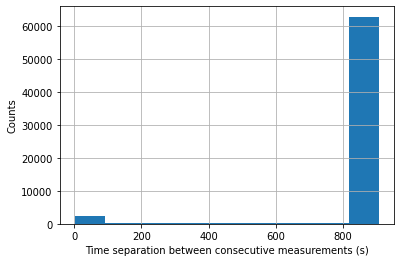

In [15]:
# Plot distribution of measurement time separation
# The largest times are removed for visualization purposes.
(df_136
 [["real_time"]]
 .diff()
 .iloc[:, 0]
 .dt
 .total_seconds()
 .sort_values(ascending=False)
 [250:]
 .hist()
)
plt.xlabel("Time separation between consecutive measurements (s)")
plt.ylabel("Counts");

We see that most entries do come in at 15 minutes intervals.

How many highlighted timestamps do we have in the data set?

In [16]:
df_136["highlight"].sum()

2

### pump 1A1029_FW

In [17]:
# Select subset of possibly interesting columns
df_029= (data_1A1029
          .rename(columns=str.lower)
          [["real_time", "p1_cycles", "p2_cycles", "p3_cycles", 
            "p1_cycleshour", "p2_cycleshour", "p3_cycleshour",
            "p1_cyctime", "p2_cyctime", "p3_cyctime",
            "p1_start_cur", "p2_start_cur", "p3_start_cur",
            "p1_steady_cur", "p2_steady_cur", "p3_steady_cur", 
            "p1_volts", "p2_volts", "p3_volts",
            "last_meg_p1", "last_meg_p2", "last_meg_p3",
            "float_1_realtime", "float_2_realtime", 
            "wifi_signal_strength", 
            "temp_unit", "temp_chamber_1", "temp_chamber_2", 
            "water_height_1", "water_height_2", 
            "battery_volt", 
            "pmx_1_sw", "pmx_1_volt", "pmx_1_batt_pct", "pmx_1_batt_age", "pmx_1_err", "pmx_1_src",
            "pmx_1_charge_time", "pmx_1_backup_time",
            "pmx_2_sw", "pmx_2_volt", "pmx_2_batt_pct", "pmx_2_batt_age", "pmx_2_err", "pmx_2_src",
            "pmx_2_charge_time", "pmx_2_backup_time",
            "service_nom", "service_act", "service_days",
            "status_p1", "offreason_p1", "ovclimitp1",
            "status_p2", "offreason_p2", "ovclimitp2",
            "actual_pressure", "pressure_limit", "offset_pressure", 
            "highlight"]]
         )

#### Investigate column properties

In [18]:
df_029.describe()

p1_cycles      p2_cycles  p3_cycles  p1_cycleshour  p2_cycleshour  \
count  153340.000000  153340.000000   153340.0  152312.000000  152312.000000   
mean       48.698624    3497.082862        0.0       0.006955       0.258015   
std         0.627434    2001.896275        0.0       0.077049       0.716368   
min        45.000000       0.000000        0.0       0.000000       0.000000   
25%        49.000000    1717.000000        0.0       0.000000       0.107000   
50%        49.000000    3408.000000        0.0       0.000000       0.166000   
75%        49.000000    5199.000000        0.0       0.000000       0.235000   
max        49.000000    6920.000000        0.0       4.205000      33.800000   

       p3_cycleshour     p1_cyctime     p2_cyctime  p3_cyctime   p1_start_cur  \
count       152312.0  153340.000000  153340.000000    153340.0  153340.000000   
mean             0.0       3.203600      39.235946         0.0       3.343386   
std              0.0       5.481204      11.472165         0.0       5.409022   
min              0.0       0.000000       0.000000         0.0       0.000000   
25%              0.0       0.000000      33.000000         0.0       0.000000   
50%              0.0       0.000000      38.000000         0.0       0.000000   
75%              0.0      11.000000      43.000000         0.0      10.600000   
max              0.0      30.000000     255.000000         0.0      12.600000   

        p2_start_cur  p3_start_cur  p1_steady_cur  p2_steady_cur  \
count  153340.000000      153340.0  153340.000000  153340.000000   
mean       11.480569           0.0       1.060665       3.880051   
std         0.815148           0.0       1.709801       0.370981   
min         0.000000           0.0       0.000000       0.000000   
25%        11.100000           0.0       0.000000       3.700000   
50%        11.500000           0.0       0.000000       3.800000   
75%        11.900000           0.0       3.600000       4.000000   
max        14.300000           0.0       3.900000       5.500000   

       p3_steady_cur       p1_volts       p2_volts  p3_volts    last_meg_p1  \
count       153340.0  153340.000000  153340.000000  153340.0  153340.000000   
mean             0.0     245.195781     247.777084       0.0      60.155445   
std              0.0       6.052966       5.370089       0.0      67.224434   
min              0.0       0.000000       0.000000       0.0       0.000000   
25%              0.0     243.000000     245.000000       0.0       5.160000   
50%              0.0     245.000000     248.000000       0.0      20.760000   
75%              0.0     248.000000     250.000000       0.0     120.520000   
max              0.0     255.000000     255.000000       0.0     268.840000   

         last_meg_p2    last_meg_p3  float_2_realtime  wifi_signal_strength  \
count  153340.000000  153340.000000               0.0         153340.000000   
mean       53.354429     115.346013               NaN             68.380429   
std        48.481456     191.932318               NaN              3.904279   
min         0.000000       0.000000               NaN              0.000000   
25%        11.140000       0.000000               NaN             66.000000   
50%        29.700000       0.000000               NaN             68.000000   
75%        95.040000     235.500000               NaN             71.000000   
max       245.670000     492.580000               NaN             84.000000   

       temp_unit  temp_chamber_1  temp_chamber_2  water_height_1  \
count   153340.0        153340.0        153340.0        153340.0   
mean         0.0             0.0             0.0             0.0   
std          0.0             0.0             0.0             0.0   
min          0.0             0.0             0.0             0.0   
25%          0.0             0.0             0.0             0.0   
50%          0.0             0.0             0.0             0.0   
75%          0.0             0.0             0.

Here again two pump units seem to be available.

In [19]:
df_029["float_1_realtime"].value_counts()

2018/01/29 09:51:38    106
2018/01/29 09:51:40     85
2018/01/29 09:51:39     75
2018/01/29 09:51:41     70
2018/01/29 09:51:42     70
                      ... 
2020/02/25 15:47:42      2
2017/09/08 09:55:05      2
2020/02/25 15:47:43      2
2017/09/08 09:55:00      1
2018/08/29 07:19:35      1
Name: float_1_realtime, Length: 7526, dtype: int64

In [20]:
df_029["float_2_realtime"].value_counts()

Series([], Name: float_2_realtime, dtype: int64)

In [21]:
# Remove unhelpful columns
df_029 = (df_029
          .drop([
              "p3_cycles", "p3_cyctime", "p3_start_cur", "p3_steady_cur", "p3_volts", "last_meg_p3",  "p3_cycleshour",
              "temp_chamber_1", "temp_chamber_2", 
              "water_height_1", "water_height_2", 
              "pmx_2_sw", "pmx_2_volt", "pmx_2_batt_pct", "pmx_2_batt_age", "pmx_2_err", "pmx_2_src",
              "pmx_2_charge_time", "pmx_2_backup_time",
              "status_p1", "offreason_p1", "ovclimitp1",
              "status_p2", "offreason_p2", "ovclimitp2",
              "actual_pressure", "pressure_limit", "offset_pressure"
          ], axis=1)
         )

In [22]:
# Set column types
df_029 = (df_029
          .assign(
              real_time=lambda x:pd.to_datetime(x["real_time"]),
              float_1_realtime=lambda x:pd.to_datetime(x["float_1_realtime"]),
              float_2_realtime=lambda x:pd.to_datetime(x["float_2_realtime"]),
              highlight=lambda x:(x["highlight"]=="yellow")
          )  
          .sort_values(
              by=["real_time"]
          )
         )

In [23]:
# Identify duplicates
(df_029
 .duplicated(subset=["real_time"], keep=False)
).sum()

2

In [34]:
df_029[df_029.duplicated(subset=["real_time"], keep=False)]

real_time  p1_cycles  p2_cycles  p1_cycleshour  \
141612 2021-06-28 13:49:31         49       6501            0.0   
141611 2021-06-28 13:49:31         49       6501            0.0   

        p2_cycleshour  p1_cyctime  p2_cyctime  p1_start_cur  p2_start_cur  \
141612          0.129           0          49           0.0          12.2   
141611          0.129           0          49           0.0          12.2   

        p1_steady_cur  p2_steady_cur  p1_volts  p2_volts  last_meg_p1  \
141612            0.0            3.6       245       247         2.05   
141611            0.0            3.6       244       245         2.05   

        last_meg_p2    float_1_realtime float_2_realtime  \
141612         5.68 2020-02-25 15:15:42              NaT   
141611         5.68 2020-02-25 15:16:04              NaT   

        wifi_signal_strength  temp_unit  battery_volt  pmx_1_sw  pmx_1_volt  \
141612                    73          0          6.64       3.1        26.0   
141611                    73          0          6.68       3.1        26.0   

        pmx_1_batt_pct  pmx_1_batt_age  pmx_1_err  pmx_1_src  \
141612              99             135         11          3   
141611              99             135         11          3   

        pmx_1_charge_time  pmx_1_backup_time  service_nom  service_act  \
141612                  2                 92            0           10   
141611                  2                 92            0           10   

        service_days  highlight  
141612            12      False  
141611            12      False

Again, these entries are almost exactly the same but for a slightly different voltage. 

In [24]:
df_029 = (df_029
          .drop_duplicates(
              subset=["real_time"],
              keep="first"
          )
         )

In [25]:
# Show the largest time separations
(df_029
 [["real_time"]]
 .diff()
 .iloc[:, 0]
 .dt
 .total_seconds()
 .sort_values(ascending=False)
 .reset_index(drop=True)
 .head(10)
)

0    63531.0
1    46457.0
2    25750.0
3    23229.0
4    20570.0
5    19813.0
6    19360.0
7    19249.0
8    18929.0
9    18070.0
Name: real_time, dtype: float64

Again we see that we have time separations much larger than expected.

In [38]:
(df_029
 [["real_time"]]
 .diff()
 .iloc[:, 0]
 .dt
 .total_seconds()
 .sort_values(ascending=True)
 .reset_index(drop=True)
 .head(10)
)

0    1.0
1    1.0
2    1.0
3    2.0
4    2.0
5    2.0
6    2.0
7    2.0
8    2.0
9    2.0
Name: real_time, dtype: float64

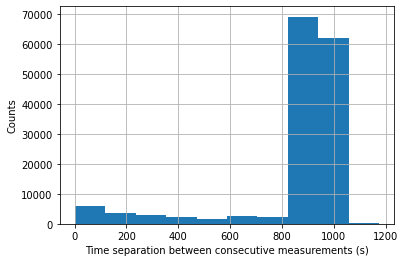

In [26]:
# Plot distribution of measurement time separation
# The largest times are removed for visualization purposes.
(df_029
 [["real_time"]]
 .diff()
 .iloc[:, 0]
 .dt
 .total_seconds()
 .sort_values(ascending=False)
 [250:]
 .hist()
)
plt.xlabel("Time separation between consecutive measurements (s)")
plt.ylabel("Counts");

There are a lot more entries here with shorter cycles.

In [27]:
# Number of highlighted timestamps
df_029["highlight"].sum()

0

### pump 1A6027_FW

In [28]:
# Select subset of possibly interesting columns
df_027= (data_1A6027
          .rename(columns=str.lower)
          [["real_time", "p1_cycles", "p2_cycles", "p3_cycles", 
            "p1_cycleshour", "p2_cycleshour", "p3_cycleshour",
            "p1_cyctime", "p2_cyctime", "p3_cyctime",
            "p1_start_cur", "p2_start_cur", "p3_start_cur",
            "p1_steady_cur", "p2_steady_cur", "p3_steady_cur", 
            "p1_volts", "p2_volts", "p3_volts",
            "last_meg_p1", "last_meg_p2", "last_meg_p3",
            "float_1_realtime", "float_2_realtime", 
            "wifi_signal_strength", 
            "temp_unit", "temp_chamber_1", "temp_chamber_2", 
            "water_height_1", "water_height_2", 
            "battery_volt", 
            "pmx_1_sw", "pmx_1_volt", "pmx_1_batt_pct", "pmx_1_batt_age", "pmx_1_err", "pmx_1_src",
            "pmx_1_charge_time", "pmx_1_backup_time",
            "pmx_2_sw", "pmx_2_volt", "pmx_2_batt_pct", "pmx_2_batt_age", "pmx_2_err", "pmx_2_src",
            "pmx_2_charge_time", "pmx_2_backup_time",
            "service_nom", "service_act", "service_days",
            "status_p1", "offreason_p1", "ovclimitp1",
            "status_p2", "offreason_p2", "ovclimitp2",
            "actual_pressure", "pressure_limit", "offset_pressure", 
            "highlight"]]
         )

#### Investigate column properties

In [29]:
df_027.describe()

p1_cycles  p2_cycles  p3_cycles  p1_cycleshour  p2_cycleshour  \
count  134251.000000   134251.0   134251.0  133651.000000       133651.0   
mean     2988.567459        0.0        0.0       0.210045            0.0   
std      1618.533625        0.0        0.0       0.543677            0.0   
min        80.000000        0.0        0.0       0.000000            0.0   
25%      1652.000000        0.0        0.0       0.094000            0.0   
50%      2790.000000        0.0        0.0       0.126000            0.0   
75%      4420.000000        0.0        0.0       0.209000            0.0   
max      5805.000000        0.0        0.0      41.379000            0.0   

       p3_cycleshour     p1_cyctime  p2_cyctime  p3_cyctime   p1_start_cur  \
count       133651.0  134251.000000    134251.0    134251.0  134251.000000   
mean             0.0      20.198345         0.0         0.0      17.858867   
std              0.0       5.946212         0.0         0.0       7.966200   
min              0.0       0.000000         0.0         0.0       0.000000   
25%              0.0      18.000000         0.0         0.0       8.900000   
50%              0.0      20.000000         0.0         0.0      22.100000   
75%              0.0      22.000000         0.0         0.0      24.400000   
max              0.0     255.000000         0.0         0.0      25.500000   

       p2_start_cur  p3_start_cur  p1_steady_cur  p2_steady_cur  \
count      134251.0      134251.0  134251.000000       134251.0   
mean            0.0           0.0       4.477267            0.0   
std             0.0           0.0       0.162914            0.0   
min             0.0           0.0       0.000000            0.0   
25%             0.0           0.0       4.400000            0.0   
50%             0.0           0.0       4.500000            0.0   
75%             0.0           0.0       4.600000            0.0   
max             0.0           0.0       5.200000            0.0   

       p3_steady_cur       p1_volts  p2_volts  p3_volts    last_meg_p1  \
count       134251.0  134251.000000  134251.0  134251.0  134251.000000   
mean             0.0     228.266501       0.0       0.0     505.671474   
std              0.0       9.805900       0.0       0.0      77.218870   
min              0.0     189.000000       0.0       0.0       0.000000   
25%              0.0     222.000000       0.0       0.0     520.830000   
50%              0.0     228.000000       0.0       0.0     529.870000   
75%              0.0     234.000000       0.0       0.0     536.650000   
max              0.0     255.000000       0.0       0.0     559.250000   

       last_meg_p2  last_meg_p3  float_2_realtime  wifi_signal_strength  \
count     134251.0     134251.0               0.0         134251.000000   
mean           0.0          0.0               NaN             65.470462   
std            0.0          0.0               NaN              4.586832   
min            0.0          0.0               NaN              0.000000   
25%            0.0          0.0               NaN             62.000000   
50%            0.0          0.0               NaN             65.000000   
75%            0.0          0.0               NaN             68.000000   
max            0.0          0.0               NaN             84.000000   

       temp_unit  temp_chamber_1  temp_chamber_2  water_height_1  \
count   134251.0        134251.0        134251.0        134251.0   
mean         0.0             0.0             0.0             0.0   
std          0.0             0.0             0.0             0.0   
min          0.0             0.0             0.0             0.0   
25%          0.0             0.0             0.0             0.0   
50%          0.0             0.0             0.0             0.0   
75%          0.0             0.0             0.0             0.0   
max          0.0             0.0             0.0             0.0   

       water_height_2   battery_volt  pmx_1_sw  pmx_1_volt  pmx

This makes more sense as it only has 1 pump unit which is what we would expect from foul water pumps.

In [31]:
df_027["float_1_realtime"].value_counts()

2018/10/09 12:23:29    27
2020/07/06 13:17:29    24
2018/10/09 12:23:28    24
2020/07/06 13:17:31    22
2020/07/06 13:36:13    21
                       ..
2020/01/08 14:56:05     1
2020/01/08 14:55:56     1
2018/10/09 12:28:43     1
2020/01/08 14:48:25     1
2018/10/09 12:08:36     1
Name: float_1_realtime, Length: 7472, dtype: int64

In [32]:
df_027["float_2_realtime"].value_counts()

Series([], Name: float_2_realtime, dtype: int64)

In [33]:
# Remove unhelpful columns
df_027 = (df_027
          .drop([
              "p3_cycles", "p3_cyctime", "p3_start_cur", "p3_steady_cur", "p3_volts", "last_meg_p3", "p3_cycleshour",
              "temp_chamber_1", "temp_chamber_2", 
              "water_height_1", "water_height_2", 
              "pmx_2_sw", "pmx_2_volt", "pmx_2_batt_pct", "pmx_2_batt_age", "pmx_2_err", "pmx_2_src",
              "pmx_2_charge_time", "pmx_2_backup_time",
              "status_p1", "offreason_p1", "ovclimitp1",
              "status_p2", "offreason_p2", "ovclimitp2",
              "actual_pressure", "pressure_limit", "offset_pressure"
          ], axis=1)
         )

In [34]:
df_027 = (df_027
          .assign(
              real_time=lambda x:pd.to_datetime(x["real_time"]),
              float_1_realtime=lambda x:pd.to_datetime(x["float_1_realtime"]),
              float_2_realtime=lambda x:pd.to_datetime(x["float_2_realtime"]),
              highlight=lambda x:(x["highlight"]=="yellow")
          )  
          .sort_values(
              by=["real_time"]
          )
         )

In [35]:
(df_027
 .duplicated(subset=["real_time"], keep=False)
).sum()

0

In [36]:
(df_027
 [["real_time"]]
 .diff()
 .iloc[:, 0]
 .dt
 .total_seconds()
 .sort_values(ascending=False)
 .reset_index(drop=True)
 .head(10)
)

0    132936.0
1     88092.0
2     87794.0
3     67830.0
4     61865.0
5     55954.0
6     45462.0
7     41184.0
8     40208.0
9     35179.0
Name: real_time, dtype: float64

In [37]:
(df_027
 [["real_time"]]
 .diff()
 .iloc[:, 0]
 .dt
 .total_seconds()
 .sort_values(ascending=True)
 .reset_index(drop=True)
 .head(10)
)

0    1.0
1    1.0
2    1.0
3    2.0
4    2.0
5    2.0
6    2.0
7    2.0
8    2.0
9    2.0
Name: real_time, dtype: float64

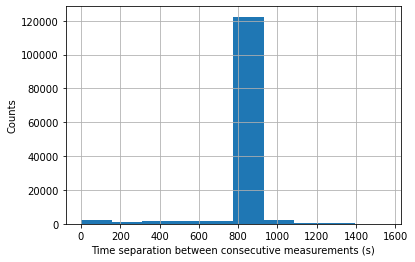

In [38]:
# Plot distribution of measurement time separation
# The largest times are removed for visualization purposes.
(df_027
 [["real_time"]]
 .diff()
 .iloc[:, 0]
 .dt
 .total_seconds()
 .sort_values(ascending=False)
 [250:]
 .hist()
)
plt.xlabel("Time separation between consecutive measurements (s)")
plt.ylabel("Counts");

In [39]:
# Number of highlighted timestamps
df_027["highlight"].sum()

0

### pump 1C1074_FW

In [40]:
# Select subset of possibly interesting columns
df_074= (data_1C1074
          .rename(columns=str.lower)
          [["real_time", "p1_cycles", "p2_cycles", "p3_cycles", 
            "p1_cycleshour", "p2_cycleshour", "p3_cycleshour",
            "p1_cyctime", "p2_cyctime", "p3_cyctime",
            "p1_start_cur", "p2_start_cur", "p3_start_cur",
            "p1_steady_cur", "p2_steady_cur", "p3_steady_cur", 
            "p1_volts", "p2_volts", "p3_volts",
            "last_meg_p1", "last_meg_p2", "last_meg_p3",
            "float_1_realtime", "float_2_realtime", 
            "wifi_signal_strength", 
            "temp_unit", "temp_chamber_1", "temp_chamber_2", 
            "water_height_1", "water_height_2", 
            "battery_volt", 
            "pmx_1_sw", "pmx_1_volt", "pmx_1_batt_pct", "pmx_1_batt_age", "pmx_1_err", "pmx_1_src",
            "pmx_1_charge_time", "pmx_1_backup_time",
            "pmx_2_sw", "pmx_2_volt", "pmx_2_batt_pct", "pmx_2_batt_age", "pmx_2_err", "pmx_2_src",
            "pmx_2_charge_time", "pmx_2_backup_time",
            "service_nom", "service_act", "service_days",
            "status_p1", "offreason_p1", "ovclimitp1",
            "status_p2", "offreason_p2", "ovclimitp2",
            "actual_pressure", "pressure_limit", "offset_pressure", 
            "highlight"]]
         )

#### Investigate column properties

In [41]:
df_074.describe()

p1_cycles  p2_cycles  p3_cycles  p1_cycleshour  p2_cycleshour  \
count  94068.000000    94068.0    94068.0   93860.000000        93860.0   
mean    2033.645522        0.0        0.0       0.067455            0.0   
std      377.856663        0.0        0.0       0.467764            0.0   
min     1521.000000        0.0        0.0       0.000000            0.0   
25%     1613.000000        0.0        0.0       0.009000            0.0   
50%     2167.000000        0.0        0.0       0.025000            0.0   
75%     2369.000000        0.0        0.0       0.057000            0.0   
max     2587.000000        0.0        0.0      40.678000            0.0   

       p3_cycleshour    p1_cyctime  p2_cyctime  p3_cyctime  p1_start_cur  \
count        93860.0  94068.000000     94068.0     94068.0  94068.000000   
mean             0.0     16.851852         0.0         0.0     15.690654   
std              0.0      1.260922         0.0         0.0      8.591258   
min              0.0      0.000000         0.0         0.0      0.000000   
25%              0.0     16.000000         0.0         0.0      5.100000   
50%              0.0     17.000000         0.0         0.0     18.600000   
75%              0.0     17.000000         0.0         0.0     24.100000   
max              0.0     22.000000         0.0         0.0     25.500000   

       p2_start_cur  p3_start_cur  p1_steady_cur  p2_steady_cur  \
count       94068.0       94068.0   94068.000000        94068.0   
mean            0.0           0.0       4.376519            0.0   
std             0.0           0.0       0.167941            0.0   
min             0.0           0.0       0.000000            0.0   
25%             0.0           0.0       4.300000            0.0   
50%             0.0           0.0       4.300000            0.0   
75%             0.0           0.0       4.500000            0.0   
max             0.0           0.0       4.800000            0.0   

       p3_steady_cur      p1_volts  p2_volts  p3_volts   last_meg_p1  \
count        94068.0  94068.000000   94068.0   94068.0  94068.000000   
mean             0.0    230.205702       0.0       0.0      6.245395   
std              0.0      9.057718       0.0       0.0      8.676003   
min              0.0    195.000000       0.0       0.0      0.000000   
25%              0.0    226.000000       0.0       0.0      0.500000   
50%              0.0    231.000000       0.0       0.0      2.220000   
75%              0.0    234.000000       0.0       0.0      8.170000   
max              0.0    255.000000       0.0       0.0     39.880000   

       last_meg_p2  last_meg_p3  float_2_realtime  wifi_signal_strength  \
count      94068.0      94068.0               0.0          94068.000000   
mean           0.0          0.0               NaN             38.360016   
std            0.0          0.0               NaN              3.184734   
min            0.0          0.0               NaN              0.000000   
25%            0.0          0.0               NaN             36.000000   
50%            0.0          0.0               NaN             38.000000   
75%            0.0          0.0               NaN             41.000000   
max            0.0          0.0               NaN             66.000000   

       temp_unit  temp_chamber_1  temp_chamber_2  water_height_1  \
count    94068.0         94068.0         94068.0         94068.0   
mean         0.0             0.0             0.0             0.0   
std          0.0             0.0             0.0             0.0   
min          0.0             0.0             0.0             0.0   
25%          0.0             0.0             0.0             0.0   
50%          0.0             0.0             0.0             0.0   
75%          0.0             0.0             0.0             0.0   
max          0.0             0.0             0.0             0.0   

       water_height_2  battery_volt  pmx_1_sw  pmx_1_volt  pmx_1_batt_pct  \
count         94068.0  94068.0

Here we have a single pump unit again.

In [42]:
df_074["float_1_realtime"].value_counts()

2019/07/16 14:35:51    38
2019/07/16 14:46:51    38
2019/07/16 14:47:18    34
2019/07/16 14:45:32    34
2019/07/16 14:34:05    34
                       ..
2019/07/16 14:46:47     2
2019/07/16 14:47:14     2
2019/07/16 14:46:54     1
2019/07/16 14:31:06     1
2019/07/16 14:43:29     1
Name: float_1_realtime, Length: 3870, dtype: int64

In [43]:
df_074["float_2_realtime"].value_counts()

Series([], Name: float_2_realtime, dtype: int64)

In [44]:
# Remove unhelpful columns
df_074 = (df_074
          .drop([
              "p3_cycles", "p3_cyctime", "p3_start_cur", "p3_steady_cur", "p3_volts", "last_meg_p3", "p3_cycleshour",
              "temp_chamber_1", "temp_chamber_2", 
              "water_height_1", "water_height_2", 
              "pmx_2_sw", "pmx_2_volt", "pmx_2_batt_pct", "pmx_2_batt_age", "pmx_2_err", "pmx_2_src",
              "pmx_2_charge_time", "pmx_2_backup_time",
              "status_p1", "offreason_p1", "ovclimitp1",
              "status_p2", "offreason_p2", "ovclimitp2",
              "actual_pressure", "pressure_limit", "offset_pressure"
          ], axis=1)
         )

In [45]:
df_074 = (df_074
          .assign(
              real_time=lambda x:pd.to_datetime(x["real_time"]),
              float_1_realtime=lambda x:pd.to_datetime(x["float_1_realtime"]),
              float_2_realtime=lambda x:pd.to_datetime(x["float_2_realtime"]),
              highlight=lambda x:(x["highlight"]=="yellow")
          )  
          .sort_values(
              by=["real_time"]
          )
         )

In [46]:
(df_074
 .duplicated(subset=["real_time"], keep=False)
).sum()

0

Here we just take a quick look at the distribution of the time separations. The existence of separation larger than 15 minutes seem to be a recurring fact that might need to be explored further.

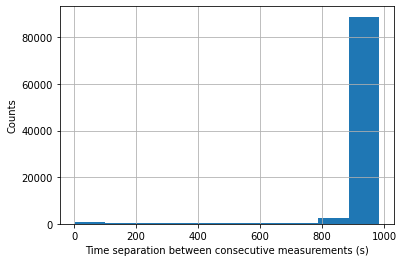

In [51]:
# Plot distribution of measurement time separation
# The largest times are removed for visualization purposes.
(df_074
 [["real_time"]]
 .diff()
 .iloc[:, 0]
 .dt
 .total_seconds()
 .sort_values(ascending=False)
 [100:]
 .hist()
)
plt.xlabel("Time separation between consecutive measurements (s)")
plt.ylabel("Counts");

In [52]:
# Number of highlighted timestamps
df_074["highlight"].sum()

0

### pump 1A5008_GW

In [53]:
# Select subset of possibly interesting columns
df_008 = (data_1A5008
          .rename(columns=str.lower)
          [["real_time", "p1_cycles", "p2_cycles", "p3_cycles", 
            "p1_cycleshour", "p2_cycleshour", "p3_cycleshour",
            "p1_cyctime", "p2_cyctime", "p3_cyctime",
            "p1_start_cur", "p2_start_cur", "p3_start_cur",
            "p1_steady_cur", "p2_steady_cur", "p3_steady_cur", 
            "p1_volts", "p2_volts", "p3_volts",
            "last_meg_p1", "last_meg_p2", "last_meg_p3",
            "float_1_realtime", "float_2_realtime", 
            "wifi_signal_strength", 
            "temp_unit", "temp_chamber_1", "temp_chamber_2", 
            "water_height_1", "water_height_2", 
            "battery_volt", 
            "pmx_1_sw", "pmx_1_volt", "pmx_1_batt_pct", "pmx_1_batt_age", "pmx_1_err", "pmx_1_src",
            "pmx_1_charge_time", "pmx_1_backup_time",
            "pmx_2_sw", "pmx_2_volt", "pmx_2_batt_pct", "pmx_2_batt_age", "pmx_2_err", "pmx_2_src",
            "pmx_2_charge_time", "pmx_2_backup_time",
            "service_nom", "service_act", "service_days",
            "status_p1", "offreason_p1", "ovclimitp1",
            "status_p2", "offreason_p2", "ovclimitp2",
            "actual_pressure", "pressure_limit", "offset_pressure", 
            "highlight"]]
         )

#### Investigate column properties

In [54]:
df_008.describe()

p1_cycles      p2_cycles  p3_cycles  p1_cycleshour  p2_cycleshour  \
count  130406.000000  130406.000000   130406.0  129856.000000   129856.00000   
mean      569.871103    1129.199124        0.0       0.089605        0.09552   
std       379.246741     470.423727        0.0       1.927718        1.06789   
min       148.000000     219.000000        0.0       0.000000        0.00000   
25%       300.000000     739.000000        0.0       0.000000        0.00000   
50%       330.000000    1263.000000        0.0       0.000000        0.03600   
75%       969.000000    1396.000000        0.0       0.036000        0.07200   
max      1219.000000    2167.000000        0.0     313.043000      171.42900   

       p3_cycleshour     p1_cyctime     p2_cyctime  p3_cyctime   p1_start_cur  \
count       129856.0  130406.000000  130406.000000    130406.0  130406.000000   
mean             0.0       5.719560      14.012147         0.0       3.355566   
std              0.0       7.862571      12.723986         0.0       3.963117   
min              0.0       0.000000       0.000000         0.0       0.000000   
25%              0.0       0.000000       0.000000         0.0       0.000000   
50%              0.0       0.000000      16.000000         0.0       3.200000   
75%              0.0      13.000000      19.000000         0.0       5.600000   
max              0.0      64.000000      55.000000         0.0      14.700000   

        p2_start_cur  p3_start_cur  p1_steady_cur  p2_steady_cur  \
count  130406.000000      130406.0  130406.000000  130406.000000   
mean        9.625299           0.0       2.103029       5.417021   
std         3.684538           0.0       2.082505       1.170784   
min         0.000000           0.0       0.000000       0.000000   
25%         6.700000           0.0       0.000000       4.200000   
50%        10.900000           0.0       3.100000       6.400000   
75%        11.700000           0.0       4.400000       6.400000   
max        21.200000           0.0      13.000000       7.100000   

       p3_steady_cur       p1_volts       p2_volts  p3_volts    last_meg_p1  \
count       130406.0  130406.000000  130406.000000  130406.0  130406.000000   
mean             0.0     241.996680     245.003213       0.0      59.889126   
std              0.0       9.282806       3.172946       0.0      22.867710   
min              0.0       0.000000       0.000000       0.0       0.000000   
25%              0.0     240.000000     244.000000       0.0      51.650000   
50%              0.0     243.000000     245.000000       0.0      64.730000   
75%              0.0     245.000000     247.000000       0.0      74.150000   
max              0.0     255.000000     254.000000       0.0     137.470000   

         last_meg_p2  last_meg_p3  wifi_signal_strength      temp_unit  \
count  130406.000000     130406.0         130406.000000  130406.000000   
mean       98.015756          0.0             45.912650      14.022499   
std        16.125456          0.0              3.873808      13.365144   
min         0.000000          0.0              0.000000       0.000000   
25%        92.560000          0.0             43.000000       0.000000   
50%        97.300000          0.0             46.000000      24.000000   
75%       100.920000          0.0             48.000000      26.000000   
max       169.400000          0.0             80.000000      33.000000   

       temp_chamber_1  temp_chamber_2  water_height_1  water_height_2  \
count        130406.0        130406.0        130406.0        130406.0   
mean              0.0             0.0             0.0             0.0   
std               0.0             0.0             0.0             0.0   
min               0.0             0.0             0.0             0.0   
25%               0.0             0.0             0.0             0.0   
50%               0.0             0.0             0.0             0.0   
75%               0.0             0.0             0.0    

Even for this ground water pump all information for temp chamber, water height, status, offreason, ovclimit, actual_pressure, pressure_limit, offset_pressure is missing.

Contrarily to what was observed above, here we have information on the battery system (pmx variables).

In [57]:
df_008["float_1_realtime"].value_counts()

2017/12/31 08:40:11    19
2021/02/25 14:43:23    19
2018/02/01 08:40:14    19
2018/02/01 08:40:15    19
2018/09/13 09:40:19    18
2017/12/10 00:40:09    18
2018/09/13 09:40:17    18
2018/09/13 09:40:18    18
2021/02/25 14:43:22    17
2017/12/31 08:40:12    16
2018/02/01 08:40:13    15
2018/09/13 09:40:20    12
2021/02/25 14:43:24    12
2017/12/10 00:40:10    10
2018/09/13 09:40:21     8
2018/04/17 00:40:17     6
2019/07/09 03:41:22     5
2021/02/25 14:43:21     4
2018/02/01 08:40:16     4
2017/12/10 00:40:11     4
2018/04/17 00:40:16     3
2018/09/13 09:40:22     3
2019/07/09 03:41:21     3
2017/12/31 08:40:10     3
2021/02/25 14:43:27     2
2018/04/17 00:40:20     2
2017/12/10 00:40:12     2
2017/12/10 00:40:14     1
2018/09/13 09:40:24     1
2018/02/01 08:40:12     1
2017/12/10 00:40:08     1
Name: float_1_realtime, dtype: int64

In [58]:
df_008["float_2_realtime"].value_counts()

2017/12/02 07:14:06    41
2017/12/02 07:13:58    41
2017/12/02 07:14:11    40
2017/12/02 07:14:01    38
2017/12/02 07:14:03    37
                       ..
2017/12/02 07:11:49     8
2017/12/02 07:14:15     4
2017/12/02 07:14:17     3
2017/12/02 07:14:18     3
2017/12/02 07:14:16     1
Name: float_2_realtime, Length: 150, dtype: int64

In this case we have information for both floats although they are both very sparse variables.

In [60]:
# Remove unhelpful columns
df_008 = (df_008
          .drop([
              "p3_cycles", "p3_cyctime", "p3_start_cur", "p3_steady_cur", "p3_volts", "last_meg_p3",
              "temp_chamber_1", "temp_chamber_2", 
              "water_height_1", "water_height_2", 
              "pmx_2_sw", "pmx_2_volt", "pmx_2_batt_pct", "pmx_2_batt_age", "pmx_2_err", "pmx_2_src",
              "pmx_2_charge_time", "pmx_2_backup_time",
              "status_p1", "offreason_p1", "ovclimitp1",
              "status_p2", "offreason_p2", "ovclimitp2",
              "actual_pressure", "pressure_limit", "offset_pressure"
          ], axis=1)
         )

In [61]:
df_008 = (df_008
          .assign(
              real_time=lambda x:pd.to_datetime(x["real_time"]),
              float_1_realtime=lambda x:pd.to_datetime(x["float_1_realtime"]),
              float_2_realtime=lambda x:pd.to_datetime(x["float_2_realtime"]),
              highlight=lambda x:(x["highlight"]=="yellow")
          )
          .sort_values(
              by=["real_time"]
          )
         )

In [62]:
(df_008
 .duplicated(subset=["real_time"], keep=False)
).sum()

0

No duplicated times are present in this dataset

In [88]:
(df_008
 [["real_time"]]
 .diff()
 .iloc[:, 0]
 .dt
 .total_seconds()
 .sort_values(ascending=False)
 .reset_index(drop=True)
 .head(10)
)

0    252637.0
1     41246.0
2     25075.0
3     16567.0
4     13861.0
5      8104.0
6      7522.0
7      7265.0
8      5278.0
9      4783.0
Name: real_time, dtype: float64

In [89]:
(df_008
 [["real_time"]]
 .diff()
 .iloc[:, 0]
 .dt
 .total_seconds()
 .sort_values(ascending=True)
 .reset_index(drop=True)
 .head(10)
)

0    2.0
1    2.0
2    2.0
3    2.0
4    2.0
5    2.0
6    2.0
7    2.0
8    2.0
9    2.0
Name: real_time, dtype: float64

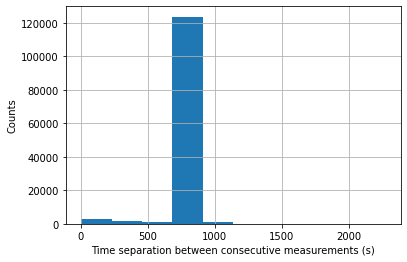

In [66]:
# Plot distribution of measurement time separation
# The largest times are removed for visualization purposes.
(df_008
 [["real_time"]]
 .diff()
 .iloc[:, 0]
 .dt
 .total_seconds()
 .sort_values(ascending=False)
 [50:]
 .hist()
)
plt.xlabel("Time separation between consecutive measurements (s)")
plt.ylabel("Counts");

In [67]:
# Number of highlighted timestamps
df_008["highlight"].sum()

117

Most of the highlighted timestamps are associated to this pump.

### pump 1A5025_GW

In [68]:
# Select subset of possibly interesting columns
df_025 = (data_1A5025
          .rename(columns=str.lower)
          [["real_time", "p1_cycles", "p2_cycles", "p3_cycles", 
            "p1_cycleshour", "p2_cycleshour", "p3_cycleshour",
            "p1_cyctime", "p2_cyctime", "p3_cyctime",
            "p1_start_cur", "p2_start_cur", "p3_start_cur",
            "p1_steady_cur", "p2_steady_cur", "p3_steady_cur", 
            "p1_volts", "p2_volts", "p3_volts",
            "last_meg_p1", "last_meg_p2", "last_meg_p3",
            "float_1_realtime", "float_2_realtime", 
            "wifi_signal_strength", 
            "temp_unit", "temp_chamber_1", "temp_chamber_2", 
            "water_height_1", "water_height_2", 
            "battery_volt", 
            "pmx_1_sw", "pmx_1_volt", "pmx_1_batt_pct", "pmx_1_batt_age", "pmx_1_err", "pmx_1_src",
            "pmx_1_charge_time", "pmx_1_backup_time",
            "pmx_2_sw", "pmx_2_volt", "pmx_2_batt_pct", "pmx_2_batt_age", "pmx_2_err", "pmx_2_src",
            "pmx_2_charge_time", "pmx_2_backup_time",
            "service_nom", "service_act", "service_days",
            "status_p1", "offreason_p1", "ovclimitp1",
            "status_p2", "offreason_p2", "ovclimitp2",
            "actual_pressure", "pressure_limit", "offset_pressure", 
            "highlight"]]
         )

#### Investigate column properties

In [69]:
df_025.describe()

p1_cycles      p2_cycles  p3_cycles  p1_cycleshour  p2_cycleshour  \
count  114260.000000  114260.000000   114260.0  113774.000000  113774.000000   
mean       61.670060      19.970611        0.0       0.004922       0.004204   
std        27.688334      12.422727        0.0       0.037402       0.060178   
min        14.000000       0.000000        0.0       0.000000       0.000000   
25%        34.000000      16.000000        0.0       0.000000       0.000000   
50%        69.000000      16.000000        0.0       0.001000       0.000000   
75%        93.000000      21.000000        0.0       0.004000       0.003000   
max        93.000000      60.000000        0.0       6.440000      14.458000   

       p3_cycleshour     p1_cyctime     p2_cyctime  p3_cyctime   p1_start_cur  \
count       113774.0  114260.000000  114260.000000    114260.0  114260.000000   
mean             0.0       7.552389       3.570707         0.0       2.659085   
std              0.0       7.386944       6.573906         0.0       1.987332   
min              0.0       0.000000       0.000000         0.0       0.000000   
25%              0.0       0.000000       0.000000         0.0       0.000000   
50%              0.0      11.000000       1.000000         0.0       3.000000   
75%              0.0      15.000000       1.000000         0.0       4.600000   
max              0.0      18.000000      25.000000         0.0       5.100000   

        p2_start_cur  p3_start_cur  p1_steady_cur  p2_steady_cur  \
count  114260.000000      114260.0  114260.000000  114260.000000   
mean        2.710205           0.0       1.377988       2.050280   
std         1.396128           0.0       0.918262       0.601338   
min         0.000000           0.0       0.000000       0.000000   
25%         1.800000           0.0       0.000000       1.800000   
50%         1.800000           0.0       2.000000       1.800000   
75%         3.900000           0.0       2.000000       2.700000   
max         7.100000           0.0       2.200000       3.900000   

       p3_steady_cur       p1_volts       p2_volts  p3_volts    last_meg_p1  \
count       114260.0  114260.000000  114260.000000  114260.0  114260.000000   
mean             0.0     239.328435     235.465473       0.0     150.587479   
std              0.0       5.892577       2.125037       0.0      21.897676   
min              0.0     215.000000     185.000000       0.0       0.000000   
25%              0.0     237.000000     234.000000       0.0     135.500000   
50%              0.0     239.000000     235.000000       0.0     136.340000   
75%              0.0     241.000000     237.000000       0.0     179.570000   
max              0.0     255.000000     247.000000       0.0     184.460000   

         last_meg_p2  last_meg_p3  float_2_realtime  wifi_signal_strength  \
count  114260.000000     114260.0               0.0         114260.000000   
mean      103.237158          0.0               NaN             56.916182   
std        11.327536          0.0               NaN              4.646985   
min         0.000000          0.0               NaN              0.000000   
25%        98.430000          0.0               NaN             54.000000   
50%       103.630000          0.0               NaN             57.000000   
75%       104.990000          0.0               NaN             60.000000   
max       211.790000          0.0               NaN             85.000000   

           temp_unit  temp_chamber_1  temp_chamber_2  water_height_1  \
count  114260.000000        114260.0        114260.0        114260.0   
mean        6.153938             0.0             0.0             0.0   
std         9.384242             0.0             0.0             0.0   
min         0.000000             0.0             0.0             0.0   
25%         0.000000             0.0             0.0             0.0   
50%         0.000000             0.0             0.0             0.0   
75%        20.000000             0.0 

In [108]:
df_025["float_1_realtime"].value_counts()

2018/10/19 07:04:08    88
2018/10/19 07:04:12    60
2019/04/24 08:30:56    58
2019/04/24 08:30:54    55
2019/04/24 08:43:46    55
                       ..
2019/04/24 09:37:49     1
2019/04/24 09:21:07     1
2019/04/24 09:19:42     1
2019/04/24 09:17:29     1
2019/04/24 09:27:22     1
Name: float_1_realtime, Length: 4223, dtype: int64

In [70]:
# Remove unhelpful columns
df_025 = (df_025
          .drop([
              "p3_cycles", "p3_cyctime", "p3_start_cur", "p3_steady_cur", "p3_volts", "last_meg_p3",
              "temp_chamber_1", "temp_chamber_2", 
              "water_height_1", "water_height_2", 
              "pmx_2_sw", "pmx_2_volt", "pmx_2_batt_pct", "pmx_2_batt_age", "pmx_2_err", "pmx_2_src",
              "pmx_2_charge_time", "pmx_2_backup_time",
              "status_p1", "offreason_p1", "ovclimitp1",
              "status_p2", "offreason_p2", "ovclimitp2",
              "actual_pressure", "pressure_limit", "offset_pressure"
          ], axis=1)
         )

In [71]:
df_025 = (df_025
          .assign(
              real_time=lambda x:pd.to_datetime(x["real_time"]),
              float_1_realtime=lambda x:pd.to_datetime(x["float_1_realtime"]),
              float_2_realtime=lambda x:pd.to_datetime(x["float_2_realtime"]),
              highlight=lambda x:(x["highlight"]=="yellow")
          )
          .sort_values(
              by=["real_time"]
          )
         )

In [72]:
(df_025
 .duplicated(subset=["real_time"], keep=False)
).sum()

4

There are a few entries with duplicated dates

In [294]:
df_025[df_025.duplicated(subset=["real_time"], keep=False)]

real_time  p1_cycles  p2_cycles  p1_cyctime  p2_cyctime  \
82957 2020-12-05 09:25:12         93         19           0           0   
82958 2020-12-05 09:25:12         93         19           0           0   
92710 2021-03-13 20:47:25         93         29           0           0   
92709 2021-03-13 20:47:25         93         29           0           0   

       p1_start_cur  p2_start_cur  p1_steady_cur  p2_steady_cur  p1_volts  \
82957           0.0           2.9            0.0            2.8       237   
82958           0.0           2.9            0.0            2.8       237   
92710           0.0           3.9            0.0            2.8       241   
92709           0.0           3.9            0.0            2.8       241   

       p2_volts  last_meg_p1  last_meg_p2 float_1_realtime  \
82957       234       135.50        97.53              NaT   
82958       234       135.50        97.53              NaT   
92710       237       135.78       106.12              NaT   
92709       237       135.78       106.12              NaT   

       wifi_signal_strength  temp_unit  battery_volt  service_nom  \
82957                    63         20          6.59            0   
82958                    63         20          6.59            0   
92710                    58         20          6.63            0   
92709                    58         20          6.55            0   

       service_act  service_days  highlight  
82957           25            28      False  
82958           25            28      False  
92710           29             7      False  
92709           29             7      False

In this case these entries are exactly duplicated (in pairs) at least along the selected variables so we'll keep only one again.

In [73]:
df_025 = (df_025
          .drop_duplicates(
              subset=["real_time"],
              keep="first"
          )
         )

In [74]:
(df_025
 [["real_time"]]
 .diff()
 .iloc[:, 0]
 .dt
 .total_seconds()
 .sort_values(ascending=False)
 .reset_index(drop=True)
 .head(10)
)

0    523530.0
1     99123.0
2     84487.0
3      9250.0
4      8714.0
5      8706.0
6      7888.0
7      5322.0
8      4350.0
9      4019.0
Name: real_time, dtype: float64

In [75]:
(df_025
 [["real_time"]]
 .diff()
 .iloc[:, 0]
 .dt
 .total_seconds()
 .sort_values(ascending=True)
 .reset_index(drop=True)
 .head(10)
)

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    2.0
9    2.0
Name: real_time, dtype: float64

<AxesSubplot:>

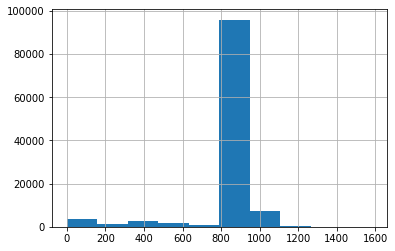

In [76]:
(df_025
 [["real_time"]]
 .diff()
 .iloc[:, 0]
 .dt
 .total_seconds()
 .sort_values(ascending=False)
 [50:]
 .hist()
)

In [77]:
# Number of highlighted timestamps
df_025["highlight"].sum()

0

### pump 1A5034_GW

In [78]:
# Select subset of possibly interesting columns
df_034 = (data_1A5034
          .rename(columns=str.lower)
          [["real_time", "p1_cycles", "p2_cycles", "p3_cycles", 
            "p1_cycleshour", "p2_cycleshour", "p3_cycleshour",
            "p1_cyctime", "p2_cyctime", "p3_cyctime",
            "p1_start_cur", "p2_start_cur", "p3_start_cur",
            "p1_steady_cur", "p2_steady_cur", "p3_steady_cur", 
            "p1_volts", "p2_volts", "p3_volts",
            "last_meg_p1", "last_meg_p2", "last_meg_p3",
            "float_1_realtime", "float_2_realtime", 
            "wifi_signal_strength", 
            "temp_unit", "temp_chamber_1", "temp_chamber_2", 
            "water_height_1", "water_height_2", 
            "battery_volt", 
            "pmx_1_sw", "pmx_1_volt", "pmx_1_batt_pct", "pmx_1_batt_age", "pmx_1_err", "pmx_1_src",
            "pmx_1_charge_time", "pmx_1_backup_time",
            "pmx_2_sw", "pmx_2_volt", "pmx_2_batt_pct", "pmx_2_batt_age", "pmx_2_err", "pmx_2_src",
            "pmx_2_charge_time", "pmx_2_backup_time",
            "service_nom", "service_act", "service_days",
            "status_p1", "offreason_p1", "ovclimitp1",
            "status_p2", "offreason_p2", "ovclimitp2",
            "actual_pressure", "pressure_limit", "offset_pressure", 
            "highlight"]]
         )

#### Investigate column properties

In [79]:
df_034.describe()

p1_cycles      p2_cycles  p3_cycles  p1_cycleshour  p2_cycleshour  \
count  136322.000000  136322.000000   136322.0  135774.000000  135774.000000   
mean     1375.998364    2757.150064        0.0       0.074076       0.216656   
std       589.030164    1987.579872        0.0       1.315336       0.665352   
min        12.000000       0.000000        0.0       0.000000       0.000000   
25%       676.000000    1886.000000        0.0       0.000000       0.000000   
50%      1711.000000    1949.000000        0.0       0.032000       0.064000   
75%      1799.000000    4225.750000        0.0       0.095000       0.251000   
max      2445.000000    6128.000000        0.0     400.000000     171.429000   

       p3_cycleshour     p1_cyctime     p2_cyctime  p3_cyctime   p1_start_cur  \
count       135774.0  136322.000000  136322.000000    136322.0  136322.000000   
mean             0.0      15.512045       8.920768         0.0       3.167688   
std              0.0      14.687856       8.371767         0.0       1.013780   
min              0.0       0.000000       0.000000         0.0       0.000000   
25%              0.0       3.000000       0.000000         0.0       2.300000   
50%              0.0       3.000000       9.000000         0.0       2.900000   
75%              0.0      31.000000      17.000000         0.0       4.300000   
max              0.0      45.000000      26.000000         0.0       5.100000   

        p2_start_cur  p3_start_cur  p1_steady_cur  p2_steady_cur  \
count  136322.000000      136322.0  136322.000000  136322.000000   
mean        2.545194           0.0       1.800299       1.537058   
std         1.578628           0.0       0.063789       0.811528   
min         0.000000           0.0       0.000000       0.000000   
25%         2.000000           0.0       1.800000       1.700000   
50%         2.200000           0.0       1.800000       1.800000   
75%         4.100000           0.0       1.800000       1.800000   
max         6.800000           0.0       2.000000       2.600000   

       p3_steady_cur       p1_volts       p2_volts  p3_volts    last_meg_p1  \
count       136322.0  136322.000000  136322.000000  136322.0  136322.000000   
mean             0.0     244.746871     246.530721       0.0     182.687099   
std              0.0       5.097847       1.987217       0.0     139.632504   
min              0.0     222.000000       0.000000       0.0       0.000000   
25%              0.0     243.000000     245.000000       0.0      58.660000   
50%              0.0     245.000000     247.000000       0.0     176.930000   
75%              0.0     247.000000     248.000000       0.0     265.450000   
max              0.0     255.000000     255.000000       0.0     536.650000   

         last_meg_p2  last_meg_p3  float_2_realtime  wifi_signal_strength  \
count  136322.000000     136322.0               0.0         136322.000000   
mean      244.823634          0.0               NaN             74.095348   
std       125.614786          0.0               NaN              3.956771   
min         0.000000          0.0               NaN              0.000000   
25%       171.280000          0.0               NaN             72.000000   
50%       257.540000          0.0               NaN             74.000000   
75%       263.750000          0.0               NaN             77.000000   
max       533.260000          0.0               NaN             84.000000   

           temp_unit  temp_chamber_1  temp_chamber_2  water_height_1  \
count  136322.000000        136322.0        136322.0        136322.0   
mean        1.815276             0.0             0.0             0.0   
std         4.295177             0.0             0.0             0.0   
min         0.000000             0.0             0.0             0.0   
25%         0.000000             0.0             0.0             0.0   
50%         0.000000             0.0             0.0             0.0   
75%         0.000000             0.0 

In [80]:
df_034["float_1_realtime"].value_counts()

2018/05/31 09:12:02    74
2018/05/31 09:12:01    64
2020/10/02 12:15:54    58
2020/10/02 12:05:56    58
2018/05/31 09:12:03    57
                       ..
2020/10/02 12:16:38     1
2020/10/02 12:16:43     1
2020/01/08 08:14:53     1
2020/01/08 08:11:35     1
2020/01/08 08:14:51     1
Name: float_1_realtime, Length: 4789, dtype: int64

In [81]:
# Remove unhelpful columns
df_034 = (df_034
          .drop([
              "p3_cycles", "p3_cyctime", "p3_start_cur", "p3_steady_cur", "p3_volts", "last_meg_p3",
              "temp_chamber_1", "temp_chamber_2", 
              "water_height_1", "water_height_2", 
              "pmx_2_sw", "pmx_2_volt", "pmx_2_batt_pct", "pmx_2_batt_age", "pmx_2_err", "pmx_2_src",
              "pmx_2_charge_time", "pmx_2_backup_time",
              "status_p1", "offreason_p1", "ovclimitp1",
              "status_p2", "offreason_p2", "ovclimitp2",
              "actual_pressure", "pressure_limit", "offset_pressure"
          ], axis=1)
         )

In [82]:
# Set correct column types
df_034 = (df_034
          .assign(
              real_time=lambda x:pd.to_datetime(x["real_time"]),
              float_1_realtime=lambda x:pd.to_datetime(x["float_1_realtime"]),
              float_2_realtime=lambda x:pd.to_datetime(x["float_2_realtime"]),
              highlight=lambda x:(x["highlight"]=="yellow")
          )
          .sort_values(
              by=["real_time"]
          )
         )

In [83]:
(df_034
 .duplicated(subset=["real_time"], keep=False)
).sum()

0

<AxesSubplot:>

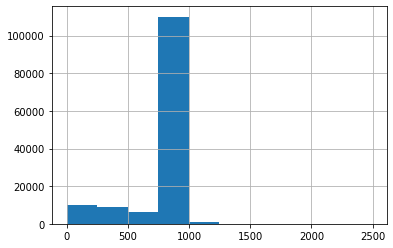

In [84]:
(df_034
 [["real_time"]]
 .diff()
 .iloc[:, 0]
 .dt
 .total_seconds()
 .sort_values(ascending=False)
 [350:]
 .hist()
)

Here we see that we have a large number of short and long cycles. Could this represent an anomaly in the pump? 

In [85]:
df_034["highlight"].sum()

0

### pump 1C1072_GW

In [86]:
# Select subset of possibly interesting columns
df_072 = (data_1C1072
          .rename(columns=str.lower)
          [["real_time", "p1_cycles", "p2_cycles", "p3_cycles", 
            "p1_cycleshour", "p2_cycleshour", "p3_cycleshour",
            "p1_cyctime", "p2_cyctime", "p3_cyctime",
            "p1_start_cur", "p2_start_cur", "p3_start_cur",
            "p1_steady_cur", "p2_steady_cur", "p3_steady_cur", 
            "p1_volts", "p2_volts", "p3_volts",
            "last_meg_p1", "last_meg_p2", "last_meg_p3",
            "float_1_realtime", "float_2_realtime", 
            "wifi_signal_strength", 
            "temp_unit", "temp_chamber_1", "temp_chamber_2", 
            "water_height_1", "water_height_2", 
            "battery_volt", 
            "pmx_1_sw", "pmx_1_volt", "pmx_1_batt_pct", "pmx_1_batt_age", "pmx_1_err", "pmx_1_src",
            "pmx_1_charge_time", "pmx_1_backup_time",
            "pmx_2_sw", "pmx_2_volt", "pmx_2_batt_pct", "pmx_2_batt_age", "pmx_2_err", "pmx_2_src",
            "pmx_2_charge_time", "pmx_2_backup_time",
            "service_nom", "service_act", "service_days",
            "status_p1", "offreason_p1", "ovclimitp1",
            "status_p2", "offreason_p2", "ovclimitp2",
            "actual_pressure", "pressure_limit", "offset_pressure", 
            "highlight"]]
         )

#### Investigate column properties

In [87]:
df_072.describe()

p1_cycles  p2_cycles  p3_cycles  p1_cycleshour  p2_cycleshour  \
count  63850.00000    63850.0    63850.0   63262.000000        63262.0   
mean   12144.72224        0.0        0.0       1.223692            0.0   
std    13005.54638        0.0        0.0       3.121497            0.0   
min        0.00000        0.0        0.0       0.000000            0.0   
25%        0.00000        0.0        0.0       0.000000            0.0   
50%        1.00000        0.0        0.0       0.000000            0.0   
75%    24968.00000        0.0        0.0       0.029000            0.0   
max    29993.00000        0.0        0.0      31.169000            0.0   

       p3_cycleshour    p1_cyctime    p2_cyctime  p3_cyctime  p1_start_cur  \
count        63262.0  63850.000000  63850.000000     63850.0  63850.000000   
mean             0.0      3.592905      0.001801         0.0      4.102199   
std              0.0      4.410109      0.042401         0.0      2.910364   
min              0.0      0.000000      0.000000         0.0      0.000000   
25%              0.0      0.000000      0.000000         0.0      0.000000   
50%              0.0      1.000000      0.000000         0.0      5.300000   
75%              0.0      7.000000      0.000000         0.0      5.800000   
max              0.0     16.000000      1.000000         0.0     11.400000   

       p2_start_cur  p3_start_cur  p1_steady_cur  p2_steady_cur  \
count       63850.0       63850.0   63850.000000        63850.0   
mean            0.0           0.0       3.532944            0.0   
std             0.0           0.0       2.433840            0.0   
min             0.0           0.0       0.000000            0.0   
25%             0.0           0.0       0.000000            0.0   
50%             0.0           0.0       5.000000            0.0   
75%             0.0           0.0       5.300000            0.0   
max             0.0           0.0       8.600000            0.0   

       p3_steady_cur      p1_volts  p2_volts  p3_volts   last_meg_p1  \
count        63850.0  63850.000000   63850.0   63850.0  63850.000000   
mean             0.0    231.272435       0.0       0.0     11.243959   
std              0.0      8.088331       0.0       0.0      3.071117   
min              0.0      0.000000       0.0       0.0      0.000000   
25%              0.0    227.000000       0.0       0.0     10.150000   
50%              0.0    232.000000       0.0       0.0     10.750000   
75%              0.0    235.000000       0.0       0.0     11.800000   
max              0.0    255.000000       0.0       0.0     25.940000   

       last_meg_p2  last_meg_p3  float_2_realtime  wifi_signal_strength  \
count      63850.0      63850.0               0.0          63850.000000   
mean           0.0          0.0               NaN             68.081175   
std            0.0          0.0               NaN              7.196932   
min            0.0          0.0               NaN              0.000000   
25%            0.0          0.0               NaN             61.000000   
50%            0.0          0.0               NaN             69.000000   
75%            0.0          0.0               NaN             74.000000   
max            0.0          0.0               NaN             93.000000   

          temp_unit  temp_chamber_1  temp_chamber_2  water_height_1  \
count  63850.000000         63850.0         63850.0         63850.0   
mean       9.980830             0.0             0.0             0.0   
std       10.746203             0.0             0.0             0.0   
min        0.000000             0.0             0.0             0.0   
25%        0.000000             0.0             0.0             0.0   
50%        0.000000             0.0             0.0             0.0   
75%       21.000000             0.0             0.0             0.0   
max       29.000000             0.0             0.0             0.0   

       water_height_2  battery_volt  pmx_1_sw  pmx_1_volt  pmx_1_batt_

In [88]:
df_072["float_1_realtime"].value_counts()

2018/08/22 10:58:59    74
2018/08/22 10:58:58    71
2018/08/22 10:58:57    43
2018/08/22 10:59:00    42
2018/08/22 10:59:04    39
                       ..
2019/02/05 10:21:01     1
2019/02/05 10:20:04     1
2019/02/05 10:17:51     1
2018/08/22 11:10:23     1
2019/02/05 10:20:24     1
Name: float_1_realtime, Length: 2466, dtype: int64

In [89]:
# Remove unhelpful columns
df_072 = (df_072
          .drop([
              "p3_cycles", "p3_cyctime", "p3_start_cur", "p3_steady_cur", "p3_volts", "last_meg_p3",
              "temp_chamber_1", "temp_chamber_2", 
              "water_height_1", "water_height_2", 
              "pmx_2_sw", "pmx_2_volt", "pmx_2_batt_pct", "pmx_2_batt_age", "pmx_2_err", "pmx_2_src",
              "pmx_2_charge_time", "pmx_2_backup_time",
              "status_p1", "offreason_p1", "ovclimitp1",
              "status_p2", "offreason_p2", "ovclimitp2",
              "actual_pressure", "pressure_limit", "offset_pressure"
          ], axis=1)
         )

In [90]:
# Set appropriate column types
df_072 = (df_072
          .assign(
              real_time=lambda x:pd.to_datetime(x["real_time"]),
              float_1_realtime=lambda x:pd.to_datetime(x["float_1_realtime"]),
              float_2_realtime=lambda x:pd.to_datetime(x["float_2_realtime"]),
              highlight=lambda x:(x["highlight"]=="yellow")
          )
          .sort_values(
              by=["real_time"]
          )
         )

In [91]:
(df_072
 .duplicated(subset=["real_time"], keep=False)
).sum()

0

<AxesSubplot:>

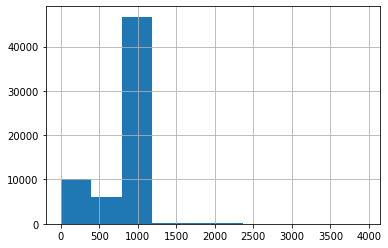

In [94]:
(df_072
 [["real_time"]]
 .diff()
 .iloc[:, 0]
 .dt
 .total_seconds()
 .sort_values(ascending=False)
 [250:]
 .hist()
)

This pump also has a rather different distribution with a lot of short and long cycles.

In [95]:
df_072["highlight"].sum()

0